In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/User/Desktop\Projects/Titanic Logistic/train.csv")
df2 = pd.read_csv("C:/Users/User/Desktop\Projects/Titanic Logistic/test.csv")
df3 = pd.concat([df, df2], ignore_index= True)
df3.columns
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


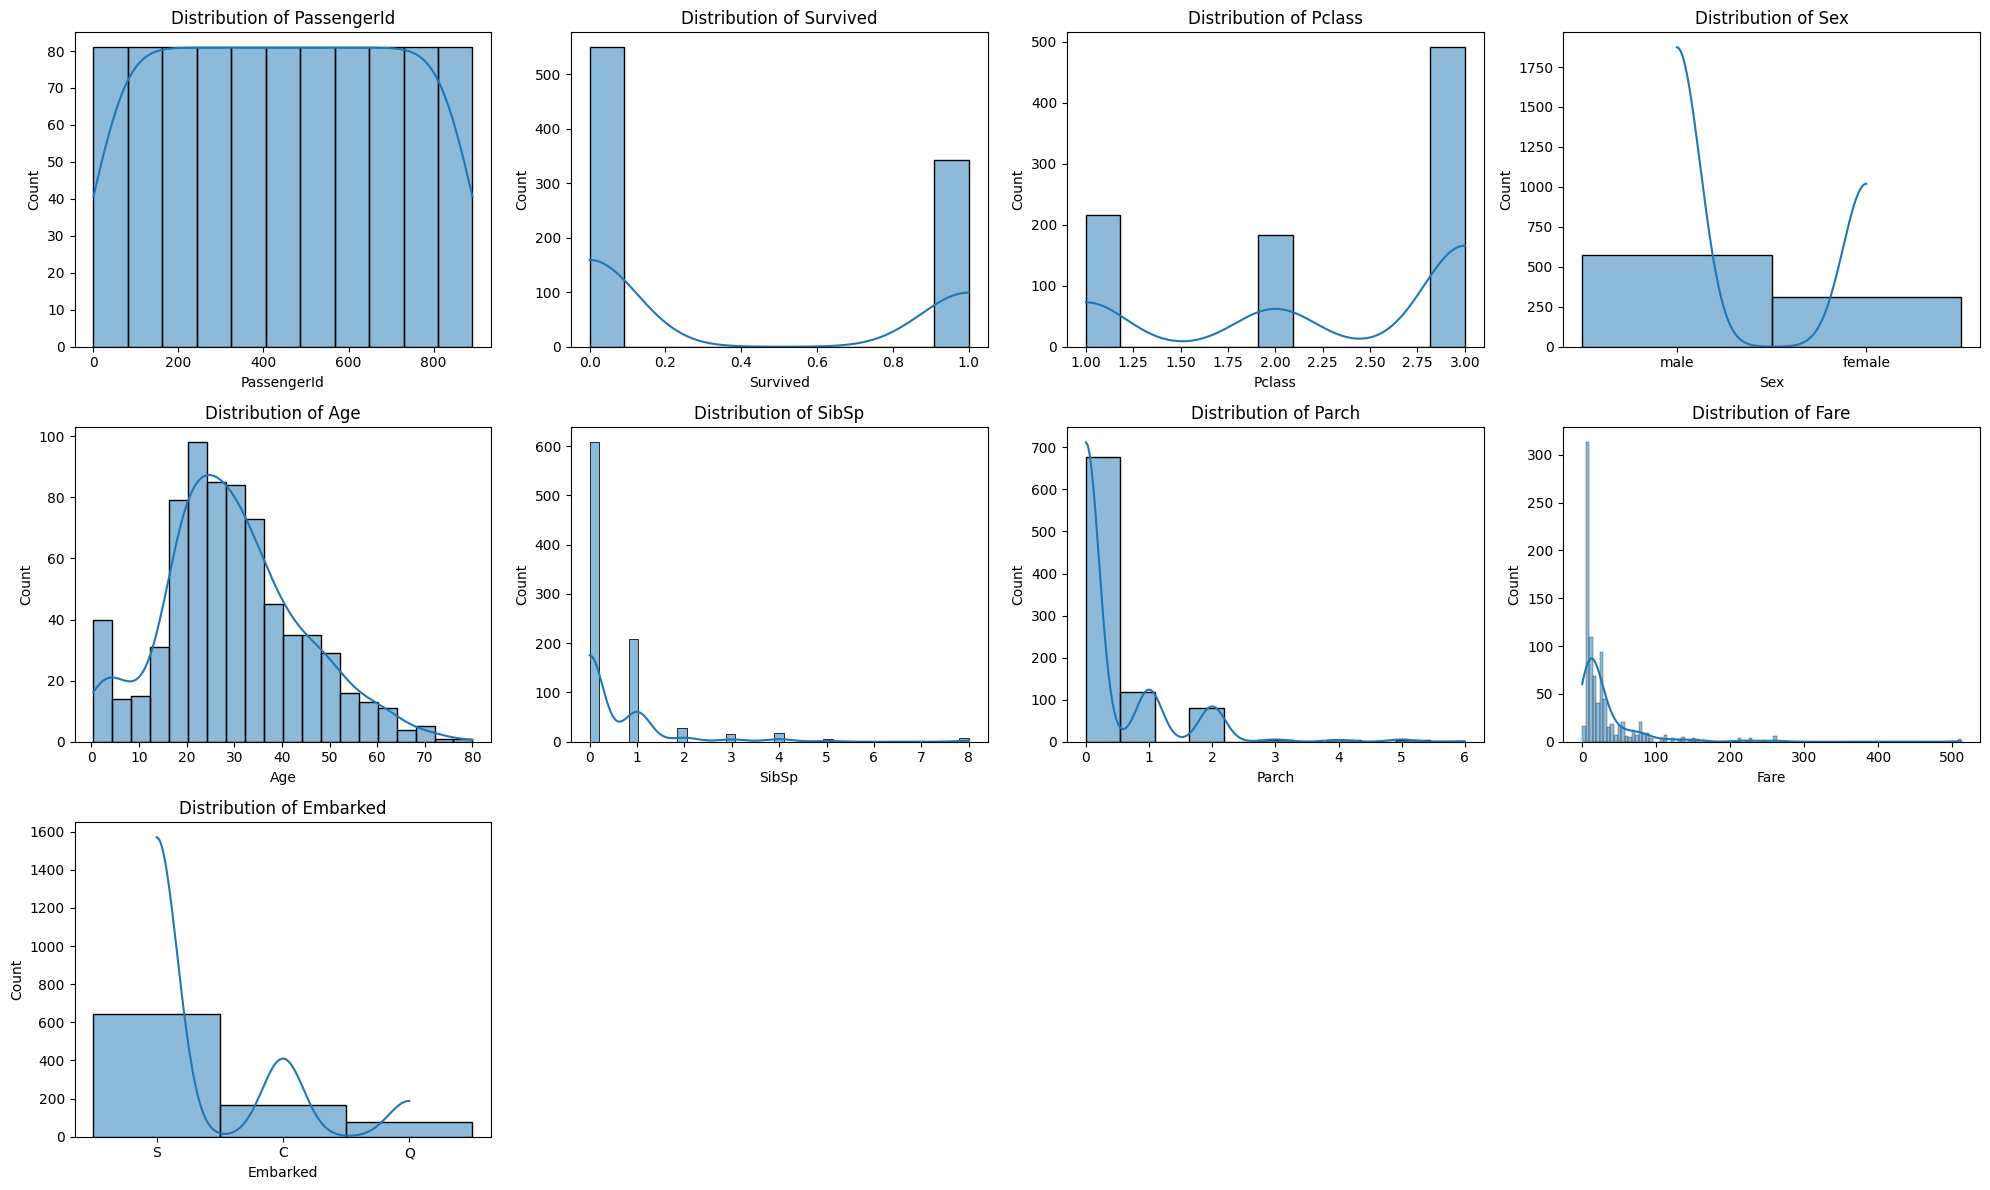

In [3]:
import math
dfc = df.drop(["Name", "Cabin", "Ticket"] , axis = 1)


num_cols = len(dfc.columns)
cols_per_row = 4  # Customize this
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, num_rows *4))

# Flatten axes to 1D array for easier looping
axes = axes.flatten()

for ax, col in zip(axes, dfc.columns):
    sns.histplot(data=dfc, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Turn off any unused axes
for i in range(len(dfc.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [4]:
dfc["Embarked"] = dfc["Embarked"].map({"S": 1, "C": 2, "Q": 3})
dfc["Sex"] = dfc["Sex"].map({"male": 1, "female": 2})

In [5]:

dfc_new = dfc.dropna(subset = ["Age", "Embarked"])
dfc_new.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = dfc_new.drop("Survived", axis = 1)
y = dfc_new["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=42)
clf = LogisticRegression(max_iter = 150, solver = "liblinear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7829787234042553

In [18]:
output_df = pd.DataFrame()
output_df["PassengerId"] = X_test["PassengerId"].values
output_df["Survived"] = y_pred

output_df.to_csv("C:/Users/User/Desktop/gender_submission.csv")